In [1]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sensorData = pd.read_csv(r"G:\Uppsala Docs\period5&6\ProcessedData\sensorData.csv")
sensorData.head(3)

,Unnamed: 0,Start,Stop,Station Name,NO2,NOX as NO2,PM2.5,CO,Black Carbon,O3,National Station Code,Longitude,Latitude,Classification,PM10
0,0,2019-01-01 00:00:00,2019-01-01 01:00:00,#Stockholm St Eriksgatan 83,13.0,22.7,21.4,NaN,NaN,NaN,157992,18.037016,59.3405,Urban Traffic,31.5
1,1,2019-01-01 01:00:00,2019-01-01 02:00:00,#Stockholm St Eriksgatan 83,10.5,17.1,8.3,NaN,NaN,NaN,157992,18.037016,59.3405,Urban Traffic,12.6
2,2,2019-01-01 02:00:00,2019-01-01 03:00:00,#Stockholm St Eriksgatan 83,6.1,12.5,3.4,NaN,NaN,NaN,157992,18.037016,59.3405,Urban Traffic,5.4


In [3]:
sensorData.describe()

,Unnamed: 0,NO2,NOX as NO2,PM2.5,CO,Black Carbon,O3,National Station Code,Longitude,Latitude,PM10
count,96360.000000,94567.000000,94688.000000,40803.000000,48736.000000,17210.000000,8511.000000,96360.000000,96360.000000,96360.000000,60422.000000
mean,40215.863636,23.192400,44.836990,5.973700,0.323945,0.550013,54.925214,54084.545455,18.045615,59.325836,17.903624
std,26652.554619,19.168868,51.487473,4.863483,0.236738,0.548290,23.418629,64049.067821,0.021659,0.011685,21.153849
min,0.000000,0.100000,0.500000,-3.000000,0.000000,0.010000,2.000000,8779.000000,18.004040,59.313300,-3.000000
25%,15329.750000,8.800000,11.500000,2.700000,0.200000,0.196250,38.500000,8781.000000,18.037016,59.316006,6.900000
50%,39419.500000,17.400000,25.700000,4.700000,0.300000,0.397000,54.400000,18640.000000,18.049046,59.317223,11.900000
75%,63509.250000,32.400000,59.300000,7.800000,0.400000,0.751000,70.100000,157992.000000,18.058254,59.340828,20.600000
max,87599.000000,169.900000,707.900000,71.200000,18.600000,30.400000,143.700000,159403.000000,18.077139,59.341076,388.500000


In [4]:
# convert columns to date
sensorData['Start'] = pd.to_datetime(sensorData['Start'])
sensorData['Stop'] = pd.to_datetime(sensorData['Stop'])
# drop Unnamed column
sensorData = sensorData.drop('Unnamed: 0', axis=1)
sensorData.dtypes

Start                    datetime64[ns]
Stop                     datetime64[ns]
Station Name                     object
NO2                             float64
NOX as NO2                      float64
PM2.5                           float64
CO                              float64
Black Carbon                    float64
O3                              float64
National Station Code             int64
Longitude                       float64
Latitude                        float64
Classification                   object
PM10                            float64
dtype: object

<AxesSubplot:>

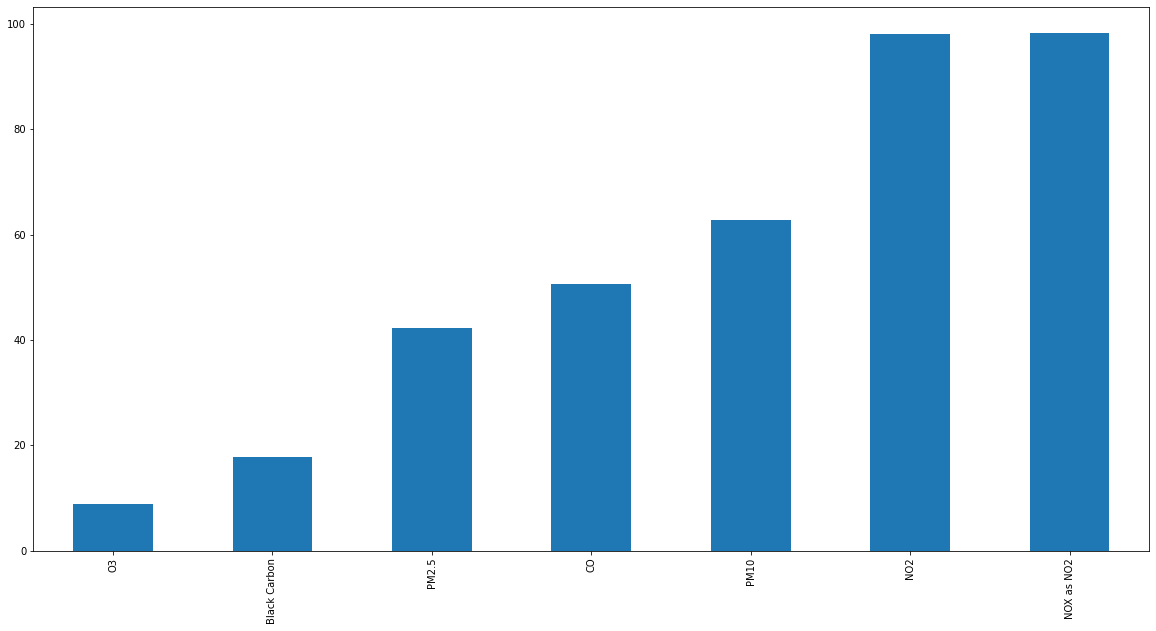

In [5]:
# percentage of columns that are not empty
total = sensorData.isnull().sum().sort_values(ascending = False)
total = total[sensorData.isnull().sum().sort_values(ascending = False) != 0]
percent =  100 - total / len(sensorData) * 100
percent[sensorData.isnull().sum().sort_values(ascending = False) != 0].plot.bar(figsize = (20,10))

In [6]:
#Correlation Matrix with Heatmap
X = sensorData.iloc[:,0:12]#.select_dtypes(include = ['float'])  #independent columns
y = sensorData.iloc[:,-1]
X.columns

Index(['Start', 'Stop', 'Station Name', 'NO2', 'NOX as NO2', 'PM2.5', 'CO',
       'Black Carbon', 'O3', 'National Station Code', 'Longitude', 'Latitude'],
      dtype='object')

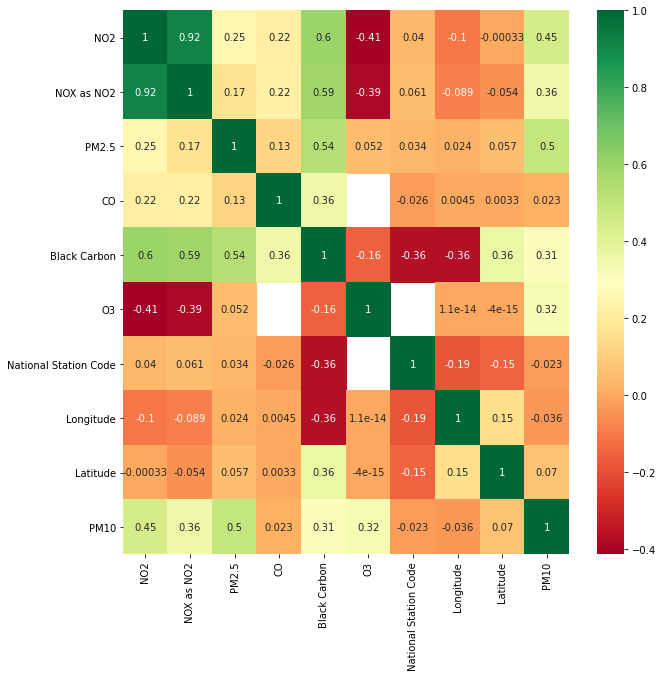

In [7]:
#get correlations of each features in dataset
corrmat = sensorData.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(sensorData[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
# select features based on Correlation
median = corrmat['PM10'].sort_values(ascending = False).median()
Cor_Select = corrmat['PM10'].sort_values(ascending = False)[corrmat['PM10'].sort_values(ascending = False)> median].index
corrmat['PM10'].sort_values(ascending = False)[corrmat['PM10'].sort_values(ascending = False)> median]

PM10          1.000000
PM2.5         0.496515
NO2           0.446427
NOX as NO2    0.356357
O3            0.322157
Name: PM10, dtype: float64

In [9]:
# selected column based on correlation and data distribution
Selected_Cols = list(Cor_Select)
Selected_Cols.append(sensorData.columns[0])
# removing O3
Selected_Cols.remove('O3')
Selected_Cols

['PM10', 'PM2.5', 'NO2', 'NOX as NO2', 'Start']

In [10]:
# Segment the data with only selectec columns
Segmented_Data = sensorData[Selected_Cols]
#rearranging columns
Segmented_Data = Segmented_Data[['Start','NO2','NOX as NO2', 'PM2.5','PM10']]
Segmented_Data.head(2)

,Start,NO2,NOX as NO2,PM2.5,PM10
0,2019-01-01 00:00:00,13.0,22.7,21.4,31.5
1,2019-01-01 01:00:00,10.5,17.1,8.3,12.6


<AxesSubplot:>

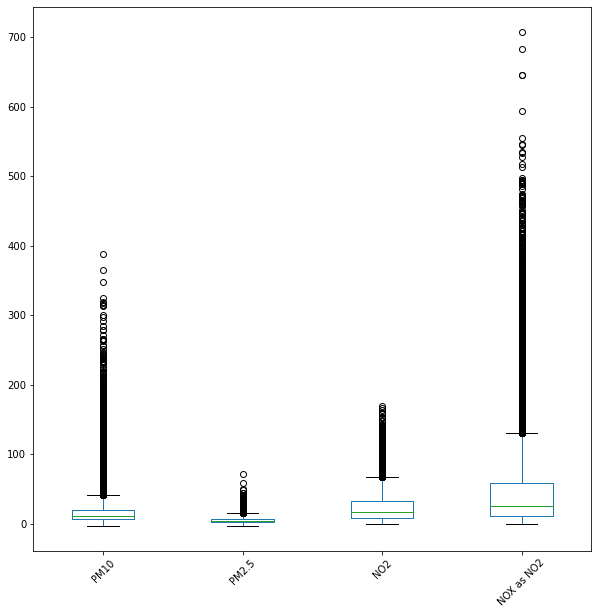

In [11]:
# outliers detection
Segmented_Data[Selected_Cols].boxplot(grid=False, rot=45, figsize=(10,10))

In [12]:
# removing Outliers
Q1 = Segmented_Data['PM2.5'].quantile(0.25)
Q3 = Segmented_Data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1 
Outlier_filter = (Segmented_Data['PM2.5'] >= Q1 - 1.5 * IQR) & (Segmented_Data['PM2.5'] <= Q3 + 1.5 *IQR)
Segmented_Data = Segmented_Data.loc[Outlier_filter]

Q1 = Segmented_Data['PM10'].quantile(0.25)
Q3 = Segmented_Data['PM10'].quantile(0.75)
IQR = Q3 - Q1 
Outlier_filter = (Segmented_Data['PM10'] >= Q1 - 1.5 * IQR) & (Segmented_Data['PM10'] <= Q3 + 1.5 *IQR)
Segmented_Data = Segmented_Data.loc[Outlier_filter]

Q1 = Segmented_Data['NO2'].quantile(0.25)
Q3 = Segmented_Data['NO2'].quantile(0.75)
IQR = Q3 - Q1 
Outlier_filter = (Segmented_Data['NO2'] >= Q1 - 1.5 * IQR) & (Segmented_Data['NO2'] <= Q3 + 1.5 *IQR)
Segmented_Data = Segmented_Data.loc[Outlier_filter]  

Q1 = Segmented_Data['NOX as NO2'].quantile(0.25)
Q3 = Segmented_Data['NOX as NO2'].quantile(0.75)
IQR = Q3 - Q1 
Outlier_filter = (Segmented_Data['NOX as NO2'] >= Q1 - 1.5 * IQR) & (Segmented_Data['NOX as NO2'] <= Q3 + 1.5 *IQR)
Segmented_Data = Segmented_Data.loc[Outlier_filter]  

#Q1 = Segmented_Data['O3'].quantile(0.25)
#Q3 = Segmented_Data['O3'].quantile(0.75)
#IQR = Q3 - Q1 
#Outlier_filter = (Segmented_Data['O3'] >= Q1 - 1.5 * IQR) & (Segmented_Data['O3'] <= Q3 + 1.5 *IQR)
#Segmented_Data = Segmented_Data.loc[Outlier_filter]  

NameError: name 'pm10_Q3' is not defined

In [ ]:
Segmented_Data

In [ ]:
# no of columns that are empty
Segmented_Data.isnull().sum().sort_values(ascending = False)

In [ ]:
df_pollutants = Segmented_Data.set_index("Start")
df_pollutants.index = pd.to_datetime(df_pollutants.index, unit='s')
#df_pollutants = df_pollutants.dropna()
df_pollutants_resample = df_pollutants.resample(rule = "M").mean().ffill()
df_pollutants_resample.plot(figsize = (20,10))
#df_pollutants.plot(figsize = (20,10))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import pickle

In [ ]:
Segmented_Data['Start'] = Segmented_Data['Start'].astype(str)

In [ ]:
Segmented_Data.dtypes

In [ ]:
# test train split
train, test = Segmented_Data[0:-20].values, Segmented_Data[-20:].values

In [ ]:
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.sales[-12:], unscaled_df.pred_value[-12:]))
    mae = mean_absolute_error(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    r2 = r2_score(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [ ]:
def scale_data(train_set, test_set):
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

#X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)

In [ ]:
def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted sales
    result_list = []
    sales_dates = list(original_df[-13:].date)
    act_sales = list(original_df[-13:].sales)
    
    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_sales[index])
        result_dict['date'] = sales_dates[index+1]
        result_list.append(result_dict)
        
    df_result = pd.DataFrame(result_list)
    
    return df_result

In [ ]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):  
    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))
        
    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

In [ ]:
def load_original_df():
    #load in original dataframe without scaling applied
    original_df = pd.read_csv('../data/train.csv')
    original_df.date = original_df.date.apply(lambda x: str(x)[:-3])
    original_df = original_df.groupby('date')['sales'].sum().reset_index()
    original_df.date = pd.to_datetime(original_df.date)
    return original_df

In [ ]:
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(original_df.date, original_df.sales, data=original_df, ax=ax, 
                 label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, 
                 label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = f"{model_name} Sales Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    
    plt.savefig(f'../model_output/{model_name}_forecast.png')

In [ ]:
def run_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
      
    get_scores(unscaled_df, original_df, model_name)
    
    plot_results(unscaled_df, original_df, model_name)

In [ ]:
# LSTM Model
def lstm_model(train_data, test_data):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), 
                   stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    
    get_scores(unscaled_df, original_df, 'LSTM')
    
    plot_results(unscaled_df, original_df, 'LSTM')

In [ ]:
lstm_model(train, test)